# Impact of Student's Previous Exam Score and Motivation Level on Final Exam Score
### Nathaniel Dizon - 100922330

## Introduction
When I first set out to find a dataset to analyze, I knew I wanted to find a dataset that had various elements that might have some relationship to a student's success on a final exam. More specifically, I had initially wanted to find a dataset that included class sizes for elementary and high school students so I could compare the average final exam scores between classes of varying sizes but I couldn't find any. Instead, I chose the dataset I used because it had 19 different elements that might impact a student in addition to their final exam score. 19 distinct elements was too many for the scope of the project so I picked two elements to analyze against each other and the student's final exam scores. The two that I picked were student's previous exam scores and their motivation level for the course the information was gathered for. Throughout the analysis section, I explored the potential relationship a student's previous exam score had on their motivation level, as well as the potential relationships between those two data points and a student's final exam score. 

## Contents
- [Data Preparation](#data-preparation)
  - [Importing Data](#importing-data)
  - [Cleaning Data and Manipulation](#cleaning-data-and-manipulation)
  - [About the Columns](#about-the-columns)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  - [Exploring a Relationship Between Previous Exam Score and Student Motivation](#exploring-a-relationship-between-previous-exam-score-and-student-motivation)
  - [Looking More Specifically at the Students in the 50% Previous Exam Score Grouping](#looking-more-specifically-at-the-students-in-the-50-previous-exam-score-grouping)
  - [Investigating Previous Score and Motivation's Impact on Final Exam Score](#investigating-previous-score-and-motivations-impact-on-final-exam-score)
  - [Investigating Motivation Level and the Difference between Previous and Final Exam Scores](#investigating-motivation-level-and-the-difference-between-previous-and-final-exam-scores)
- [Conclusion](#conclusion)
- [References](#references)

## Data Preparation <a name="link1"></a>
### Importing Data <a name="link2"></a>
I imported the data from a CSV file that I downloaded from Kaggle. It contains various pieces of information regarding factors that may impact the success of a student on a course's final evaluation. Each row represents a different student participating a course, and each column has different information about the students, one of which is the final exam score for the course the student is taking. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing the libraries I'll use throughout the analysis

data = pd.read_csv("StudentPerformanceFactors.csv")
# Creating a data frame using the data set imported from the StudentPerformanceFactors.csv file, and assigning it to a variable called 'data'

### Cleaning Data and Manipulation <a name="link3"></a>
The data set didn't have any missing values so I didn't have to clean any missing values out of the dataset. There is a lot of extra columns that I won't need for my analysis so I'll remove them from the data frame that I'm working with. I've decided to explore the relationship between previous exam scores and motivation level, as well as how the two impact final exam scores, so those are the three columns that I kept.

In [2]:
data = data.reindex(['Previous_Scores','Motivation_Level','Exam_Score'],axis=1)
# Removing unneeded columns and reording them
data.columns = ['Previous Exam Score', 'Motivation Level', 'Final Exam Score']
# Renaming the columns to have cleaner names


#### *About the Columns* <a name="link4"></a>
- **Previous Scores** is the score a student received on their previous exam
- **Motivation Level** is how motivated a student felt to work in the course described by Low/Medium/High
- **Exam Score** is the score the student received on their final exam

I'd like to add a columns to the dataframe that contain what percentage range [50-59,60-69,70-79,80-89,90-100] each student's previous and curent exam score falls into. This way, I can more easily display my data grouped into percentage ranges later on, rather than have bars for every unique score. The two new columns to represent these pieces of information for each student are:
<br>
- **Previous Exam Score Grouping** percentage grouping of previous exam score
- **Final Exam Score Grouping** percentage grouping of final exam score

In [3]:

data['Previous Exam Score Grouping'] = (data.loc[:]['Previous Exam Score'] // 10) * 10
# Creating a new column that contains the percentage grouping that the student's previous exam score falls into
data['Final Exam Score Grouping'] = (data.loc[:]['Final Exam Score'] // 10) * 10
# Creating a new column that contains the percentage grouping that the student's exam score falls into
display(data)

,Previous Exam Score,Motivation Level,Final Exam Score,Previous Exam Score Grouping,Final Exam Score Grouping
0,73,Low,67,70,60
1,59,Low,61,50,60
2,91,Medium,74,90,70
3,98,Medium,71,90,70
4,65,Medium,70,60,70
...,...,...,...,...,...
6602,76,Medium,68,70,60
6603,81,Medium,69,80,60
6604,65,Low,68,60,60
6605,91,High,68,90,60


### Exploratory Data Analysis <a name="link5"></a>
Now that the data is simplified and ready to work with, I can start by exploring a relationship between a student's previous exam score and their current motivation level for their course.

#### *Exploring a Relationship Between Previous Exam Score and Student Motivation* <a name="link6"></a>
First I'll generate a bar graph to depict how many students fell into each motivation category. Each motivation category is further broken down to count how many students are within each previous exam score grouping.

<Axes: title={'center': 'Distribution of Motivation Levels of Students'}, xlabel='Motivation Level', ylabel='Number of Students'>

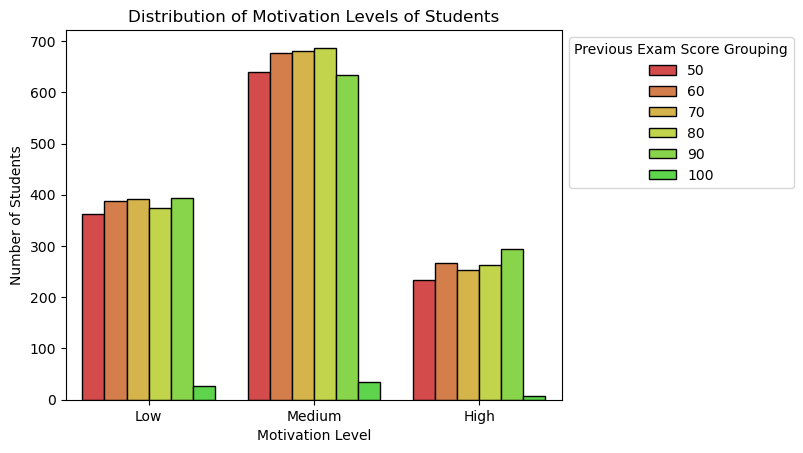

In [4]:
motivationCountPlot = sns.countplot(data=data, x='Motivation Level', 
                                    palette=['#eb3434','#eb7a34','#ebc034','#d3eb34','#86eb34','#4ceb34'], 
                                    edgecolor='black', 
                                    hue='Previous Exam Score Grouping')
motivationCountPlot.set(ylabel='Number of Students',
                        title='Distribution of Motivation Levels of Students')
motivationCountPlot.legend(loc='upper left', bbox_to_anchor=(1,1), title='Previous Exam Score Grouping')
# Generating a bar graph showing how many students are in each motivation category
# I've also styled the graph to have a title, correct y-axis title, as well as colours and borders to help visually distinguish between the score groupings
# The legend is also moved to the right of the plot so it isn't covering it.
display(motivationCountPlot)

The graph shows us that most of the students that got 100 on the previous exam fall into the low and medium effory categories. This might imply that students that are exceptionally succeeding in the previous exam may already know the course content and that they do not need to put a lot of effort into relearning it. It may also be that case that these students feel they can put this course "on the backburner" and focus on other courses because they have already achieved the minimum grade to pass the course with the result of the previous exam. 
<br><br>
The other previous score groupings seem to be spread very similarly to each other without an obvious pattern among the motivation levels. This seems to imply that for this population of students, there is not really a sweeping relationship between the previous score a student earned and their current motivation level.
<br><br>
I had initially expected to find that students that previously received a low score would tend to have a high motivation to complete the course work to help ensure that they passed, and that students that previously received a high score would have a low or medium level of motivation to complete course work since their exam score implies that they are understanding the course content well. 

#### *Looking More Specifically at the Students in the 50% Previous Exam Score Grouping* <a name="link7"></a>
I want to see if there is some motivation level tendency for students who are low or high within the 50% grouping for the previous exam score. Before I start making observations, I will create a copy of the data, but only include the rows of the students that are in the 50% grouping for the previous score.

In [5]:
fiftyScores = data.loc[data.loc[:]['Previous Exam Score Grouping'] == 50]
# Creating a view of the dataframe, that only shows the rows where 'Previous Score Grouping' is equal to 50

Now that I have a dataframe that contains only the values that I want to work with here, I can create a graph similar to the previous one that first seperates the students into motivation levels, but this time, they'll also be segmented into each actual score within the 50% grouping.

<Axes: title={'center': 'Motivation and Scores of Students in the 50% Previous Exam Score Grouping'}, xlabel='Motivation Level', ylabel='Number of Students'>

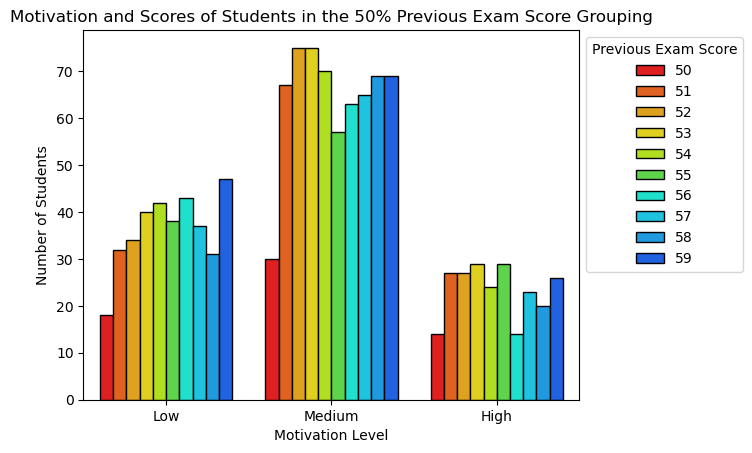

In [6]:
fiftyScoreMotivationPlot = sns.countplot(data=fiftyScores, x='Motivation Level',
                                         palette=['#ff0000','#ff5800','#ffad00','#ffe900','#bfff00','#4ceb34','#00ffe5','#00d9ff','#00a1ff','#0058ff','#3500ff'], 
                                         edgecolor='black', 
                                         hue='Previous Exam Score')
fiftyScoreMotivationPlot.set(ylabel='Number of Students',
                             title='Motivation and Scores of Students in the 50% Previous Exam Score Grouping')
fiftyScoreMotivationPlot.legend(loc='upper left', bbox_to_anchor=(1,1), title='Previous Exam Score')
# Creating and styling a count plot of the 50% grouping of previous exam scores
display(fiftyScoreMotivationPlot)

Something interesting about this graph is that even though we are only looking at the students in the 50% grouping for the previous exam, the distribution between the three motivation levels is very similar to that of the whole population seen in the previous graph. I expected to see a greater proportion of students in the low 50% range (50,51,52) to have a tendency for high working motivation in the course, since they are the closest to failing. However, these students follow the same tendency as the rest of the students in that there are a majority of them within the medium motivation group, while the rest of them are quite evenly distributed between the low and high motivation groups. 
<br><br>
One thing to note is that the score that appears most frequently within the low motivation category is 59%, while the scores that appear most frequently in the medium motivation category is 53% and 54%. This somewhat follows the behaviour I had initially predicted where higher scores would have lower motivation and vice versa, but this isn't really that strong of an indicator of that. 
<br><br>
Now that we've investigated a relationship between previous exam score and motivation level, we can move on to investigating a relationship between those two variables and the students' final exam score. 

#### *Investigating Previous Score and Motivation's Impact on Final Exam Score* <a name="link8"></a>
First, I want to look at the relationship between a student's previous score and the final exam score. To do this, I'm going to generate a scatter plot using the dataframe. I'm also going to create a count plot with the x-axis as the previous exam score groupings, further subdivided into the final exam score groupings.

C:\Users\nsdiz\AppData\Local\Temp\ipykernel_29016\159366911.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  scoresPlots.show()


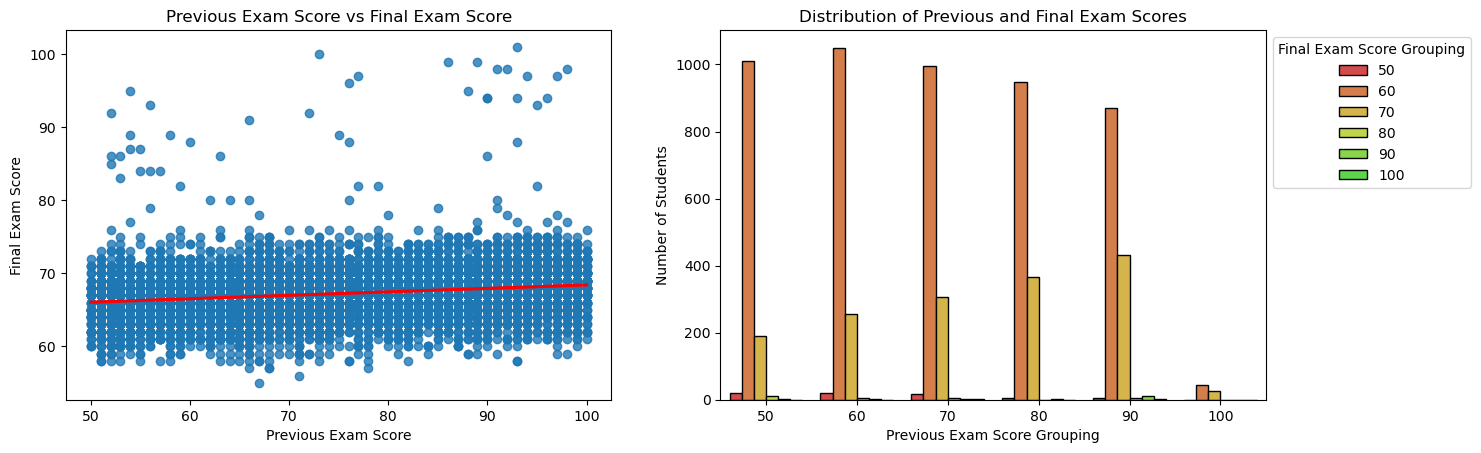

In [7]:
# scoresScatterPlot.set()
scoresPlots, axes = plt.subplots(1,2)
# Creating a matplotlib figure to contain and display the two seaborn plots side by side
axes[0] = sns.regplot(data=data, x='Previous Exam Score', y='Final Exam Score', line_kws=dict(color="red"), ax=axes[0])
axes[0].set(title='Previous Exam Score vs Final Exam Score')

axes[1] = sns.countplot(data=data, x='Previous Exam Score Grouping', hue='Final Exam Score Grouping', ax=axes[1],
                        palette=['#eb3434','#eb7a34','#ebc034','#d3eb34','#86eb34','#4ceb34'],
                        edgecolor='black')
axes[1].set(title='Distribution of Previous and Final Exam Scores',
            ylabel='Number of Students')
# Creating and styling a scatter plot with regression line and 
# a countplot modeling the relationship between previous exam scores and final exam scores and 
# placing them on the axis of the scoresPlots figure

axes[1].legend(loc='upper left', bbox_to_anchor=(1,1), title='Final Exam Score Grouping')
scoresPlots.subplots_adjust(left=None, bottom=None, right=2, top=None,wspace=None, hspace=None)
# Positioning the legend of the count plot and creating spacing between the two plots within the matplotlib figure

scoresPlots.show()

First looking at the scatter plot, the regression line shows a slight positive relationship between the previous exam score and the final exam score. We can extrapolate that if you score well on the previous exam, you will have a tendency to score higher on the final exam than those who scored lower than you on the previous exam.
<br><br>
Now looking at the bar graph, it is very apparent that most of the scores in all of the categories are within the 60% and 70% groupings. We can also see that generally, the higher you score on the previous exam, the more likely you are to score a 70% on the final exam. The number of people who score 70% on the final exam increases almost linearly as the previous exam score increases, except for when the previous exam score was 100%. The opposite pattern is true for the students who scored 60% on the final exam. This supports the findings from the regression line that as previous exam score goes up, final exam score tends to go up.
<br><br>
Since so much of the data is contained by the 60% and 70% groupings, it's really hard to see how the remaining student scores are distributed. I'm going to remove those two groupings from the data set before I graph it again so we see only the 50%, 80%, 90%, and 100% groupings. This way, we can see how the student scores are distributed among these groupings. 

<Axes: title={'center': 'Distribution of Previous and Final Exam Scores without 60% and 70% Groups'}, xlabel='Previous Exam Score Grouping', ylabel='Number of Students'>

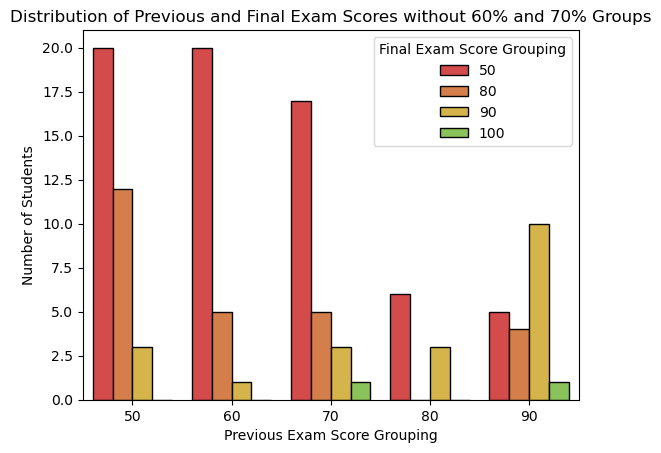

In [8]:
trimmedFinalExamScores = data.loc[data.loc[:]['Final Exam Score Grouping'] != 60]
# Creating a view of the dataframe without the students who fall into the 60% final exam score grouping
trimmedFinalExamScores = trimmedFinalExamScores[trimmedFinalExamScores.loc[:]['Final Exam Score Grouping'] != 70]
# Removing the students who fall into the 70% final exam score grouping from the view created on the previous line

scoresBarPlot = sns.countplot(data=trimmedFinalExamScores, x='Previous Exam Score Grouping', hue='Final Exam Score Grouping',
                              palette=['#eb3434','#eb7a34','#ebc034','#88d44b'],
                              edgecolor='black')
scoresBarPlot.set(title='Distribution of Previous and Final Exam Scores without 60% and 70% Groups',
                  ylabel='Number of Students')
# Creating and styling a countplot modeling the relationship between previous exam scores and final exam scores without the 60% and 70% groups

display(scoresBarPlot)

Now that we can see the non 60% and 70% grouping more clearly, we continue to see that when students had a higher previous exam score, they also tended to have a higher final exam score. There are much less people who scored in the 50s for the final exam when they received 90s on the previous exam, and much more people in the 90% and 100% categories for the final exam score in this category compared to the other previous exam score groupings. These findings fall in line with the behaviour we expected to happen based on the previous scatter plot's regression line; that is, students with a higher previous exam score tended to have relatively higher final exam scores. 
#### *Investigating Motivation Level and the Difference between Previous and Final Exam Scores* <a name="link9"></a>
Since we have established that there is a positive relationship between previous and final exam scores, I want to see specifically how much a student's grade tended to increase or decrease between their previous and final exam scores based on their motivation level. 
<br><br>
First, I'm going to add another column to the data set that contains the difference between each student's final exam score and their previous exam score. Then I'm going to group the students together by motivation level, and calculate the mean score difference for each motivation level.

In [9]:
data['Score Difference'] = data.loc[:]['Final Exam Score'] - data.loc[:]['Previous Exam Score']
# Creating a column to hold the difference between a student's final and previous exam scores

motivationDifferences = data['Score Difference'].groupby(data['Motivation Level']).mean().round(2)
# Grouping the students together based on their motivation level and calculating the means of the score differences
motivationDifferences = pd.DataFrame(motivationDifferences)
display(motivationDifferences)

,Score Difference
Motivation Level,
High,-7.88
Low,-8.45
Medium,-7.46


The first thing I noticed was that there was an average decrease in score across all three motivation levels. The students with a low motivation level had the largest average decrease in score. This result aligns with the intuitive idea that you will tend to score lower if you do not have a low motivation to complete course work. The remaining two categories do not continue to support this tendency though, as the students with high motivation had a greater average reduction in score than the students in the medium motivation group. We may not continue to see the expected relationship because there are so many more students in the medium motivation level category, which may reduce the impact of large outliers on the mean for that category. 

## Conclusion <a name="link10"></a>
To summarize the findings of the analysis, the majority of students that got 100% on their previous exams tended to have a motivation level of low or medium. Most of the students fell into the medium motivation level, but other than that, there is not much of an apparent relationship between previous exam scores and motivation level.
<br><br>
For the students that fell into the 50% range for their previous exam score, they were distributed similarly among the motivation levels as the full set of students were. There was no apparent relationship between the two elements among these students either, but there was a noticeably greater proportion of students with a 52% and 53% score in the medium motivation level compared to the other scores at this level. 
<br><br>
When comparing student's previous exam scores to their final exam scores in a scatter plot, the regression line depicts a weak to moderate positive relationship between the two. This implies that if you scored well on your previous exam, you can use that as a loose indicator that you will score relatively well on your final exam compared to students who achieved a lower score than you on the previous exam. 
<br><br>
When looking at how students final exam scores are distributed among the groupings of student scores on their previous exam, the number of students in the lower final scores decreased as the previous scores increased and vice versa. Most of the students final exam scores fell into the 60% and 70% groupings which portrayed this pattern as well.
<br><br>
When looking at the average difference between a student's final and previous exam scores, students in the low motivation level had a greater average decrease in score compared to the medium and high motivation level students.

## References <a name="link11"></a>
I got my dataset from Kaggle at this link:<br><br>
  https://www.kaggle.com/datasets/lainguyn123/student-performance-factors<br><br>
I used three of the python libraries taught in class to import, manipulate, and display my data:<br><br>
  Pandas - https://pandas.pydata.org/<br><br>
  Seaborn - https://seaborn.pydata.org/<br><br>
  MatPlotLib - https://matplotlib.org/